# **Part 1**

# **Downloading the Dataset**
The description of CICIDS2017 dataset is accessible at https://www.unb.ca/cic/datasets/ids-2017.html

There are three versions available:

1.   Raw network captured data (PCAPs),
2.   Generated Labelled Flows, and
3.   Machine Learning CSV.

In this notebook, we will download the `MachineLearningCSV.zip` version of this dataset.

When downloading this dataset, we rename the `MachineLearningCSV.zip` file to `MachineLearningCVE.zip` because in the `MachineLearningCSV.md5` the target filename is `MachineLearningCVE.zip`.

In [1]:
!wget -nc -O MachineLearningCVE.zip http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip

# Download MachineLearningCSV.md5 file to check the integrity of the downloaded file.
!wget -nc http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.md5

# Checking the file integrity.
!md5sum -c MachineLearningCSV.md5

--2025-04-21 20:27:51--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCVE.zip’

MachineLearningCVE. 100%[===================>] 224.21M  1.50MB/s    in 15m 46s 

2025-04-21 20:43:37 (243 KB/s) - ‘MachineLearningCVE.zip’ saved [235102953/235102953]

--2025-04-21 20:43:38--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/CIC-IDS-2017/CSVs/MachineLearningCSV.md5
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57
Saving to: ‘MachineLearningCSV.md5’

MachineLearningCSV. 100%[===================>]      57  --.-KB/s    in 0s      

2025-04-21 20:43:38 (2.36 MB/s) - ‘MachineLearningCSV.md5’ saved [57/57]

MachineLearningCVE.zip: OK


# **Saving the Dataset**
Save the zip and extracted files to Google Drive at `CICIDS2017` folder.

In [4]:
!mkdir -p "/Users/saniyainayath/Downloads/CICIDS2017/"

!cp MachineLearningCVE.zip "/Users/saniyainayath/Downloads/CICIDS2017/"

cp: /Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE.zip and MachineLearningCVE.zip are identical (not copied).


# **Unzip the Dataset**
Unzip the `MachineLearningCVE.zip`.

There are eight files extracted from this zip file.


1.  `Monday-WorkingHours.pcap_ISCX.csv`
2.  `Tuesday-WorkingHours.pcap_ISCX.csv`
3.  `Wednesday-workingHours.pcap_ISCX.csv`
4.  `Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv`
5.  `Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv`
6.  `Friday-WorkingHours-Morning.pcap_ISCX.csv`
7.  `Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv`
8.  `Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv`

In [7]:
!unzip -n "/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE.zip"

Archive:  /Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


# **Part 2**

**2.1 Dataset Characteristics and EDA**

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
sns.set(style='darkgrid')
import matplotlib.pyplot as plt

# Loading the dataset
data1 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv')
data2 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv')
data3 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv')
data4 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv')
data5 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv')
data6 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv')
data7 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
data8 = pd.read_csv(r'/Users/saniyainayath/Downloads/CICIDS2017/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')

data_list = [data1, data2, data3, data4, data5, data6, data7, data8]

print('Data dimensions: ')
for i, data in enumerate(data_list, start = 1):
  rows, cols = data.shape
  print(f'Data{i} -> {rows} rows, {cols} columns')

Data dimensions: 
Data1 -> 529918 rows, 79 columns
Data2 -> 445909 rows, 79 columns
Data3 -> 692703 rows, 79 columns
Data4 -> 170366 rows, 79 columns
Data5 -> 288602 rows, 79 columns
Data6 -> 191033 rows, 79 columns
Data7 -> 286467 rows, 79 columns
Data8 -> 225745 rows, 79 columns


In [12]:
data = pd.concat(data_list)
rows, cols = data.shape

print('New dimension:')
print(f'Number of rows: {rows}')
print(f'Number of columns: {cols}')
print(f'Total cells: {rows * cols}')

New dimension:
Number of rows: 2830743
Number of columns: 79
Total cells: 223628697


In [15]:
# Deleting dataframes after concating to save memory
for d in data_list: del d

In [17]:
# Renaming the columns by removing leading/trailing whitespace
col_names = {col: col.strip() for col in data.columns}
data.rename(columns = col_names, inplace = True)

data.columns

Index(['Destination Port', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Total Length of Fwd Packets',
       'Total Length of Bwd Packets', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Co

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2830743 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  Flow I

In [23]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
data.describe().transpose()


Overview of Columns:


,count,mean,std,min,25%,50%,75%,max
Destination Port,2830743.0,8.071483e+03,1.828363e+04,0.000000e+00,53.000000,80.000000,4.430000e+02,6.553500e+04
Flow Duration,2830743.0,1.478566e+07,3.365374e+07,-1.300000e+01,155.000000,31316.000000,3.204828e+06,1.200000e+08
Total Fwd Packets,2830743.0,9.361160e+00,7.496728e+02,1.000000e+00,2.000000,2.000000,5.000000e+00,2.197590e+05
Total Backward Packets,2830743.0,1.039377e+01,9.973883e+02,0.000000e+00,1.000000,2.000000,4.000000e+00,2.919220e+05
Total Length of Fwd Packets,2830743.0,5.493024e+02,9.993589e+03,0.000000e+00,12.000000,62.000000,1.870000e+02,1.290000e+07
Total Length of Bwd Packets,2830743.0,1.616264e+04,2.263088e+06,0.000000e+00,0.000000,123.000000,4.820000e+02,6.554530e+08
Fwd Packet Length Max,2830743.0,2.075999e+02,7.171848e+02,0.000000e+00,6.000000,37.000000,8.100000e+01,2.482000e+04
Fwd Packet Length Min,2830743.0,1.871366e+01,6.033935e+01,0.000000e+00,0.000000,2.000000,3.600000e+01,2.325000e+03
Fwd Packet Length Mean,2830743.0,5.820194e+01,1.860912e+02,0.000000e+00,6.000000,34.000000,5.000000e+01,5.940857e+03
Fwd Packet Length Std,2830743.0,6.891013e+01,2.811871e+02,0.000000e+00,0.000000,0.000000,2.616295e+01,7.125597e+03


In [25]:
pd.options.display.max_columns = 80
data

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,49188,4,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,3.000000e+06,5.000000e+05,4.0,0.0,4,4,4,4.0,0.0,4,4,0,0.0,0.0,0,0,0,0,0,0,40,0,5.000000e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,49188,1,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,1.200000e+07,2.000000e+06,1.0,0.0,1,1,1,1.0,0.0,1,1,0,0.0,0.0,0,0,0,0,0,0,40,0,2.000000e+06,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,329,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,49486,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,6.666667e+05,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,6.666667e+05,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,245,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225740,61374,61,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.967213e+05,3.278689e+04,61.0,0.0,61,61,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.639344e+04,16393.44262,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225741,61378,72,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.666667e+05,2.777778e+04,72.0,0.0,72,72,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.388889e+04,13888.88889,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225742,61375,75,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.600000e+05,2.666667e+04,75.0,0.0,75,75,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,1.333333e+04,13333.33333,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,288,253,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
225743,61323,48,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,2.500000e+05,4.166667e+04,48.0,0.0,48,48,48,48.0,0.0,48,48,0,0.0,0.0,0,0,0,0,0,0,40,0,4.166667e+04,0.00000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,4719,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


**2.2 Data Cleaning**

In [28]:
# Identifying duplicate values
dups = data[data.duplicated()]
print(f'Number of duplicates: {len(dups)}')

data.drop_duplicates(inplace = True)
data.shape

Number of duplicates: 308381


(2522362, 79)

From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values. For both columns, the number of missing values is 1564 which is 0.06% of total values.

In [31]:
# Identifying Missing Values
missing_val = data.isna().sum()

# Checking for infinity values
numeric_cols = data.select_dtypes(include=np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()

# Replacing any infinite values (positive or negative) with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Calculating missing value percentage in the dataset
missing = data.isna().sum()
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis=1)
mis_table = mis_table.rename(columns={0: 'Missing Values', 1: 'Percentage of Total Values'})

# Calculate medians
med_flow_bytes = data['Flow Bytes/s'].median()
med_flow_packets = data['Flow Packets/s'].median()

# Filling missing values with median (without chained assignment)
data['Flow Bytes/s'] = data['Flow Bytes/s'].fillna(med_flow_bytes)
data['Flow Packets/s'] = data['Flow Packets/s'].fillna(med_flow_packets)


The first step is to identify duplicate rows and missing or invalid values. We identified and dropped the duplicate rows (308381 rows). From the data description, we identified that the dataset has infinity values. So, we checked and replaced the positive or negative infinity values with NaN (not a number) and counted it as a missing value. In the dataset, two features, FlowBytes/s, and Flow Packets/s contain missing values.

Flow Bytes/s and Flow Packets/s are continuous variables. The data is not normally distributed. The variables have extreme values or outliers. So, our strategy is to fill in missing values with median value. Because, filling the missing values with the median does not introduce any new categories or disrupt the distribution of the data.

**Visualization of column correlation. Also, plotting Heat Map**

In [34]:
data['Label'].unique()

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack � Brute Force', 'Web Attack � XSS',
       'Web Attack � Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [37]:
# Types of attacks & normal instances (BENIGN)
data['Label'].value_counts()

Label
BENIGN                        2096484
DoS Hulk                       172849
DDoS                           128016
PortScan                        90819
DoS GoldenEye                   10286
FTP-Patator                      5933
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1953
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

We mapped each label to the corresponding attack type. This groups similar attacks together and provides an easier and more interpretable way to analyze the dataset and identify patterns in the different types of attacks.

In [40]:
# Creating a dictionary that maps each label to its attack type
attack_map = {
    'BENIGN': 'BENIGN',
    'DDoS': 'DDoS',
    'DoS Hulk': 'DoS',
    'DoS GoldenEye': 'DoS',
    'DoS slowloris': 'DoS',
    'DoS Slowhttptest': 'DoS',
    'PortScan': 'Port Scan',
    'FTP-Patator': 'Brute Force',
    'SSH-Patator': 'Brute Force',
    'Bot': 'Bot',
    'Web Attack � Brute Force': 'Web Attack',
    'Web Attack � XSS': 'Web Attack',
    'Web Attack � Sql Injection': 'Web Attack',
    'Infiltration': 'Infiltration',
    'Heartbleed': 'Heartbleed'
}

# Creating a new column 'Attack Type' in the DataFrame based on the attack_map dictionary
data['Attack Type'] = data['Label'].map(attack_map)

In [42]:
data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

In [44]:
data.drop('Label', axis = 1, inplace = True)

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 2 4 5 8 6 1 7 3]


In [48]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bot
2: Brute Force
3: DDoS
4: DoS
5: Heartbleed
6: Infiltration
7: Port Scan
8: Web Attack


In [50]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

For plotting the correlation matrix, we encoded the 'Attack Type' column and plotted the heatmap. From the heatmap, we observe that there are many pairs of highly correlated features. Highly correlated features in the dataset are problematic and lead to overfitting. A positive correlation exists when one variable decreases as the other variable decreases or one variable increases while the other increases. There are 32 features with positive correlations that may help in predicting the target feature.

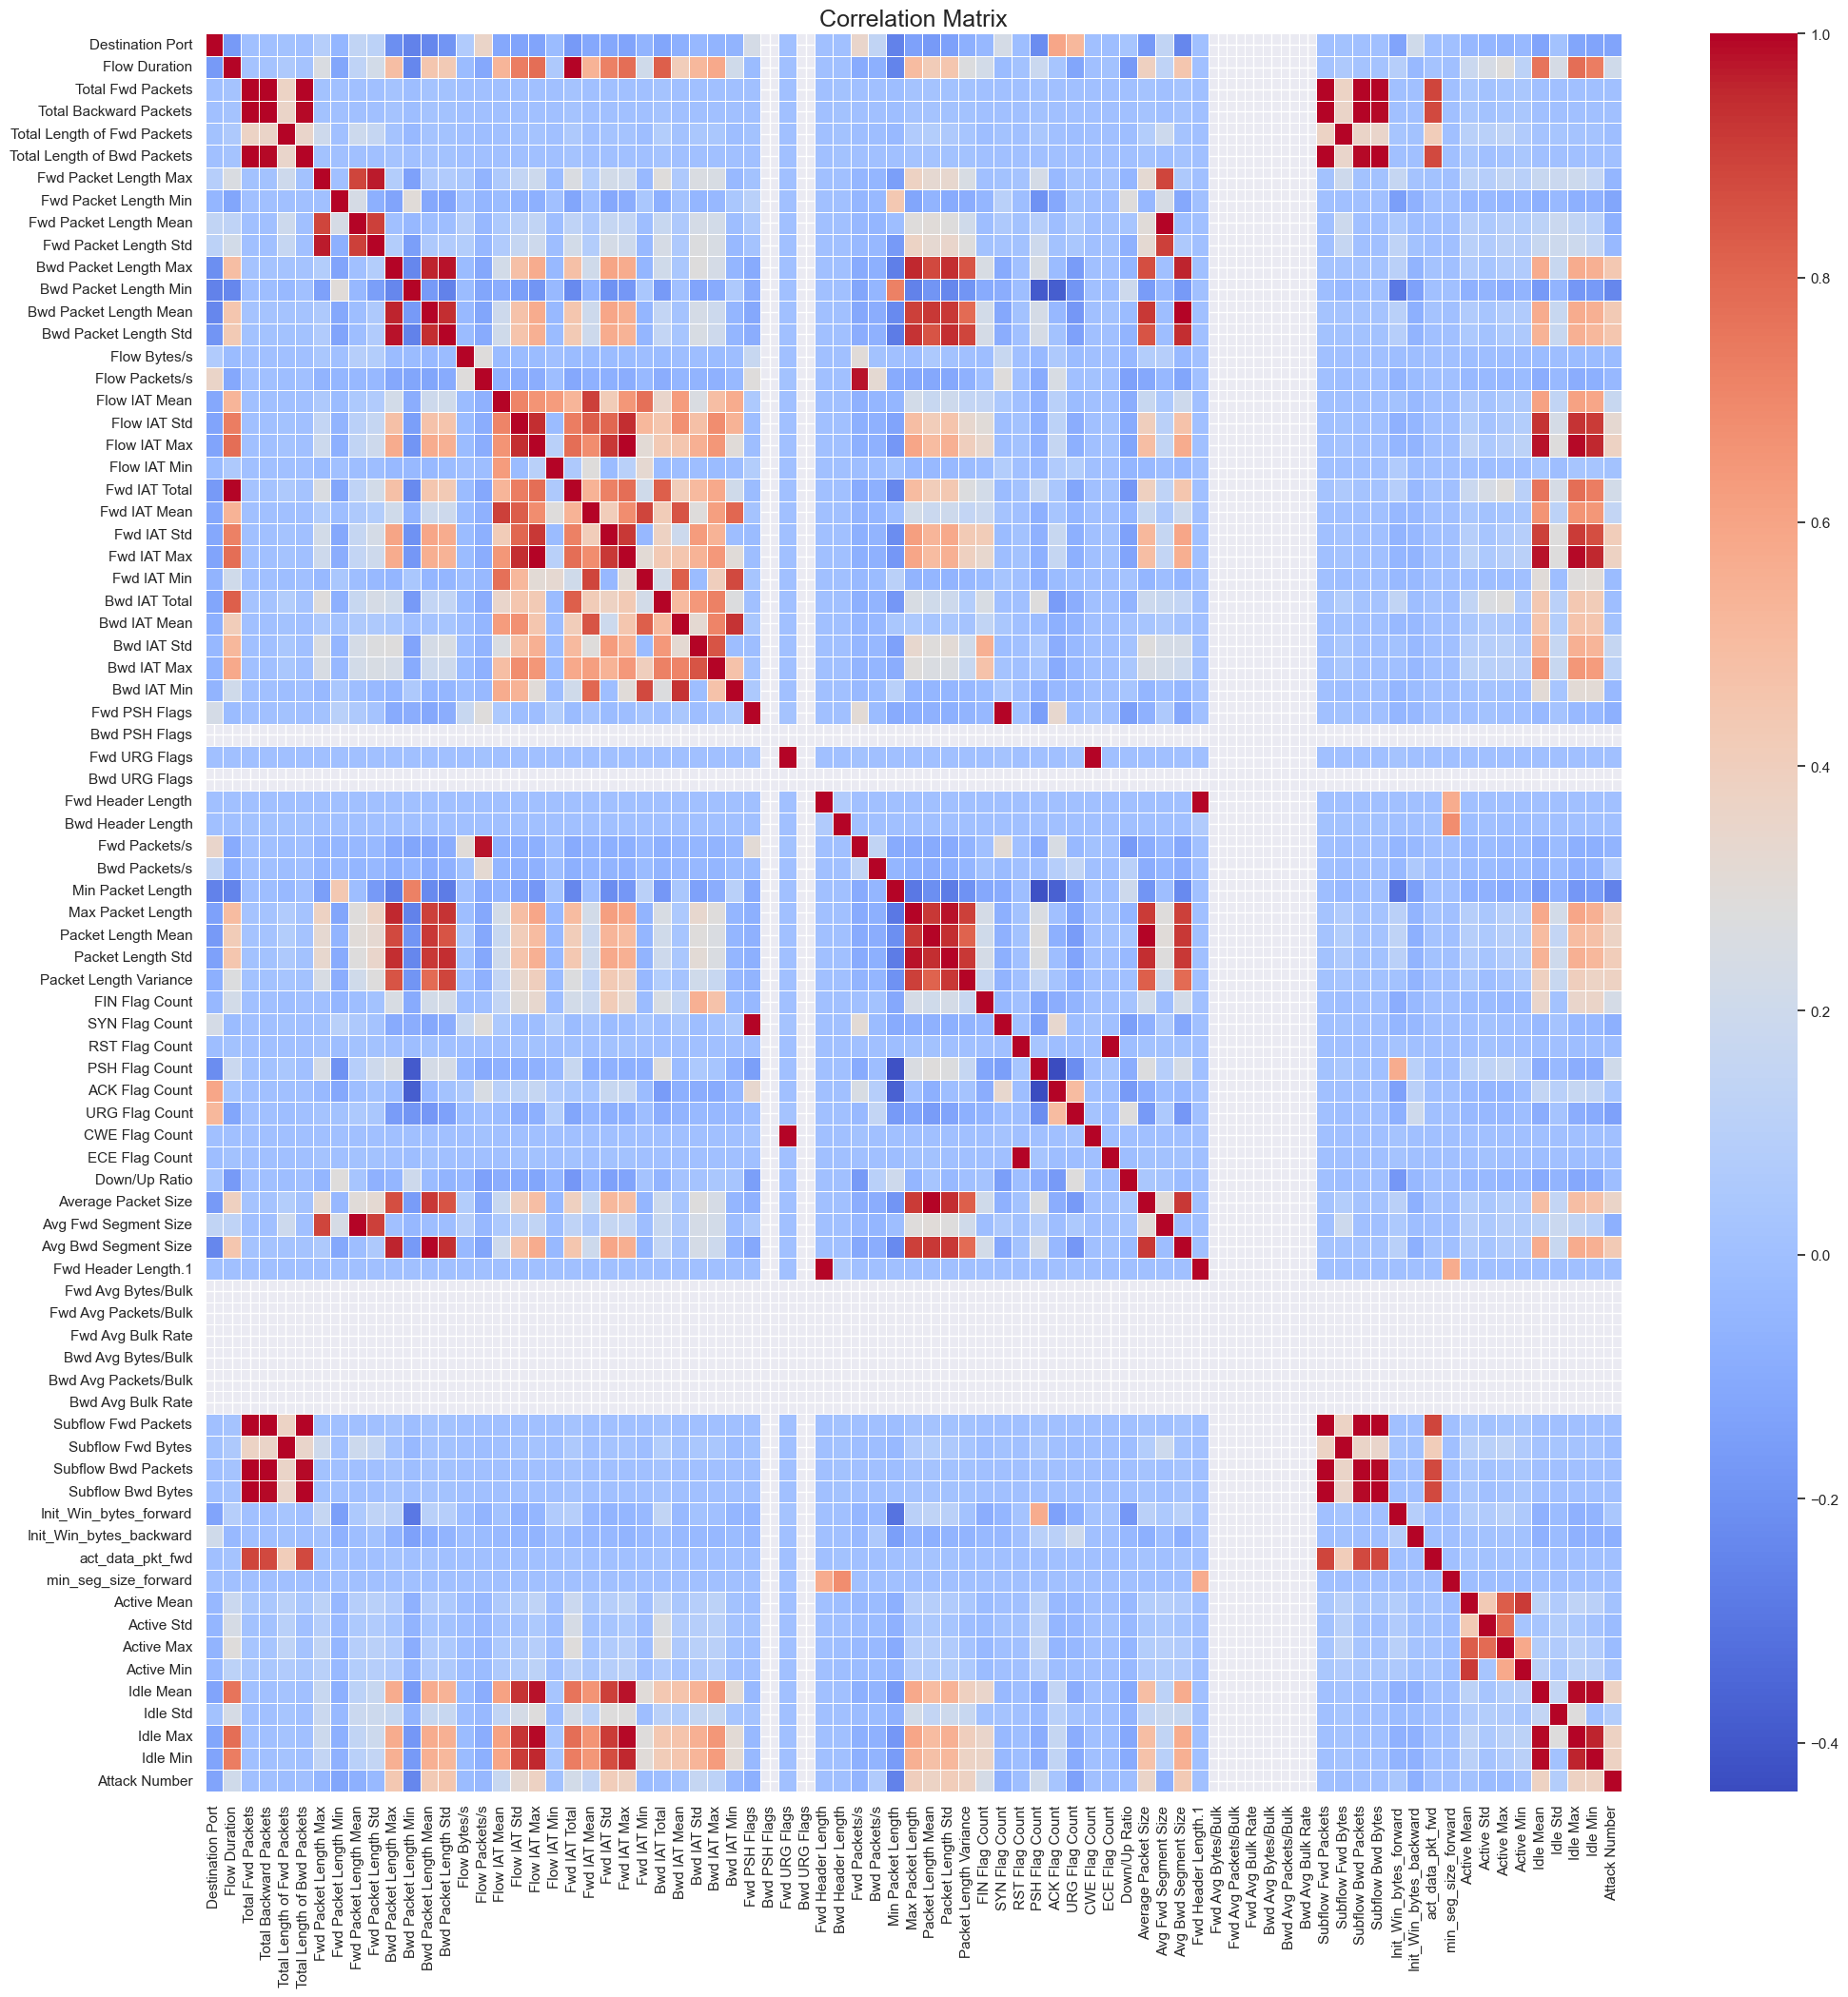

In [52]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [55]:
# Checking for columns with zero standard deviation (the blank squares in the heatmap)
std = data.std(numeric_only = True)
zero_std_cols = std[std == 0].index.tolist()
zero_std_cols

['Bwd PSH Flags',
 'Bwd URG Flags',
 'Fwd Avg Bytes/Bulk',
 'Fwd Avg Packets/Bulk',
 'Fwd Avg Bulk Rate',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate']

The columns with zero standard deviation have the same value in all rows. These columns don't have any variance. It simply means that there is no meaningful relationship with any other columns which results in NaN correlation cofficient. These columns cannot help differentiate between the classes or groups of data. So, these zero standard deviation columns don't contribute to the correlation matrix and will appear blank in the heatmap. This can be helpful while doing data processing as we may drop the columns if we find out that these columns has no variation.

# **Part 3**

**Data Preprocessing**

In [60]:
# For improving performance and reduce memory-related errors
old_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f'Initial memory usage: {old_memory_usage:.2f} MB')
for col in data.columns:
    col_type = data[col].dtype
    if col_type != object:
        c_min = data[col].min()
        c_max = data[col].max()
        # Downcasting float64 to float32
        if str(col_type).find('float') >= 0 and c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
            data[col] = data[col].astype(np.float32)

        # Downcasting int64 to int32
        elif str(col_type).find('int') >= 0 and c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
            data[col] = data[col].astype(np.int32)

new_memory_usage = data.memory_usage().sum() / 1024 ** 2
print(f"Final memory usage: {new_memory_usage:.2f} MB")

Initial memory usage: 1558.77 MB
Final memory usage: 817.87 MB


In [62]:
# Dropping columns with only one unique value
num_unique = data.nunique()
one_variable = num_unique[num_unique == 1]
not_one_variable = num_unique[num_unique > 1].index

dropped_cols = one_variable.index
data = data[not_one_variable]

print('Dropped columns:')
dropped_cols

Dropped columns:


Index(['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk',
       'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk',
       'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate'],
      dtype='object')

In [64]:
data.shape

(2522362, 72)

**Applying PCA to reduce dimensions**

A simple and effective way to reduce the dimensionality of the dataset and improve the performance of the model is to use strongly correlated features. We used label encoding on the target feature where the numerical values assigned to each category do not have inherent meaning and they are arbitrary. For this reason, the correlation matrix calculated using label-encoded variables may not accurately reflect the true relationships between the variables.

In [68]:
# We applied StandardScaler before performing Incremental PCA to standardize the data values into a standard format.

# Standardizing the dataset
from sklearn.preprocessing import StandardScaler

features = data.drop('Attack Type', axis = 1)
attacks = data['Attack Type']

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Incremental PCA is a variant of PCA that allows for the efficient computation of principal components of a large dataset that cannot be stored in memory.

In [71]:
from sklearn.decomposition import IncrementalPCA

size = len(features.columns) // 2
ipca = IncrementalPCA(n_components = size, batch_size = 500)

Interrupt kernel for below code snippet after 120 seconds

In [74]:
for batch in np.array_split(scaled_features, len(features) // 500):
    ipca.partial_fit(batch)

In [76]:
print(f'information retained: {sum(ipca.explained_variance_ratio_):.2%}')

information retained: 99.08%


In [78]:
transformed_features = ipca.transform(scaled_features)
new_data = pd.DataFrame(transformed_features, columns = [f'PC{i+1}' for i in range(size)])
new_data['Attack Type'] = attacks.values

new_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,Attack Type
0,-2.390979,-0.054142,0.569875,0.608032,3.748798,0.193173,-0.016745,-0.214749,-0.249818,1.072820,0.027764,0.072717,1.631085,0.341142,-0.651065,-0.219538,-0.021560,0.856945,-1.010637,-0.494206,-0.231351,0.392588,-1.322745,-1.155252,0.426982,-0.203502,0.707226,0.167883,-0.518800,1.451156,-0.156591,0.262873,0.001385,0.002666,-0.014743,BENIGN
1,-2.913872,-0.069280,0.888999,1.462739,8.890884,0.517774,-0.061181,1.115094,1.970735,-2.750156,-0.938309,-0.856632,6.064292,1.648550,-4.436560,0.457313,0.126661,2.744867,-1.251672,-1.175413,0.449872,-0.181980,-3.095385,-4.359373,-0.747583,1.647961,0.214982,-0.017288,-2.543196,2.112990,-0.649356,0.563292,0.027271,0.000827,-0.020609,BENIGN
2,-2.449933,-0.055862,0.606199,0.704919,4.325623,0.227464,-0.021853,-0.068832,-0.002663,0.652011,-0.079217,-0.030004,2.127053,0.486180,-1.069720,-0.145599,-0.005278,1.067408,-1.040237,-0.570533,-0.156835,0.327739,-1.521185,-1.511857,0.292344,0.000146,0.656176,0.150637,-0.732336,1.525840,-0.208474,0.294626,0.004077,0.002472,-0.015138,BENIGN
3,-2.914726,-0.069319,0.889864,1.464659,8.896365,0.515998,-0.061352,1.113251,1.971161,-2.746190,-0.937948,-0.856092,6.067683,1.648321,-4.434604,0.456047,0.126475,2.745560,-1.254490,-1.176051,0.448696,-0.182989,-3.096865,-4.359964,-0.751714,1.645890,0.218626,-0.013960,-2.531800,2.114137,-0.646487,0.561665,0.027086,0.000837,-0.020353,BENIGN
4,-1.538079,0.080213,-0.489878,0.320055,-0.525546,0.755004,0.100991,0.729182,-1.141042,-0.572120,-0.042371,-0.208746,-0.431690,0.058894,-0.612646,-0.182541,-0.043138,-0.489221,-0.067839,0.195739,-0.115099,-0.052994,0.234367,-0.015421,-0.121340,-0.398819,-0.239837,-0.782527,0.348497,0.860799,-0.178431,-0.246678,-0.026624,0.000898,0.022294,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522357,-2.304647,-0.047668,0.476010,0.385633,2.175687,-0.164691,-0.015810,-0.779535,-0.897969,2.692285,0.402762,0.417807,0.976069,-0.162212,0.984885,-0.124635,-0.012811,0.390389,-0.437485,-0.139683,-0.404873,0.813215,-0.815716,0.029081,0.471459,-0.179731,0.614358,0.472443,0.588583,0.787838,0.261563,-0.053321,-0.018226,0.001904,-0.001623,BENIGN
2522358,-2.301679,-0.047573,0.474787,0.383356,2.155614,-0.166606,-0.015741,-0.782345,-0.900963,2.698772,0.405266,0.420720,0.943108,-0.170048,1.002846,-0.137057,-0.015166,0.377361,-0.468034,-0.159414,-0.409050,0.834273,-0.815270,0.001444,0.458927,-0.172247,0.617024,0.477510,0.587569,0.788610,0.262761,-0.053720,-0.018305,0.001906,-0.000911,BENIGN
2522359,-2.301010,-0.047552,0.474510,0.382820,2.151095,-0.167023,-0.015725,-0.782962,-0.901615,2.700166,0.405815,0.421362,0.935759,-0.171781,1.006808,-0.139803,-0.015687,0.374467,-0.474789,-0.163777,-0.409971,0.838951,-0.815152,-0.004662,0.456153,-0.170581,0.617562,0.478571,0.587203,0.788784,0.262980,-0.053784,-0.018320,0.001906,-0.000755,BENIGN
2522360,-2.135438,-0.041386,0.357036,0.207592,1.803137,0.264473,0.006410,-0.297039,-0.613434,0.952894,0.077112,0.115930,-0.174846,0.112663,-0.160169,-0.683337,-0.117070,-0.130666,-0.963408,-0.056482,-0.551410,-0.047130,-0.445903,-0.467596,0.374285,-0.898459,0.657317,0.305405,1.751218,-0.857851,0.304591,-0.201020,-0.011825,0.002121,0.053010,BENIGN


In [79]:
# Specify the file path where you want to save the preprocessed data
output_path = r"/Users/saniyainayath/Downloads/CICIDS2017/preprocessed_data.csv"

# Save the DataFrame as a CSV file
new_data.to_csv(output_path, index=False)

print(f"Preprocessed data saved successfully at: {output_path}")


Preprocessed data saved successfully at: /Users/saniyainayath/Downloads/CICIDS2017/preprocessed_data.csv


# **4. Machine Learning Models**

In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

We know that a balanced dataset is crucial in machine learning because it ensures that each class or category of data is represented equally. This means that the number of observations in each class is roughly the same which prevents the model from being biased toward the majority class. A biased dataset can lead to poor model performance, as the model may have difficulty predicting the minority classes. 

**Creating a balanced dataset for Binary Classification**

The labels for the `Attack Type` column are defined as follows:

- **`0`**: Represents **BENIGN** traffic, indicating normal, non-malicious activity.
- **`1`**: Represents **intrusions**, indicating malicious activity (any attack type that is not `BENIGN`).

In [86]:
# Creating a balanced dataset for Binary Classification
normal_traffic = new_data.loc[new_data['Attack Type'] == 'BENIGN']
intrusions = new_data.loc[new_data['Attack Type'] != 'BENIGN']

normal_traffic = normal_traffic.sample(n = len(intrusions), replace = False)

ids_data = pd.concat([intrusions, normal_traffic])
ids_data['Attack Type'] = np.where((ids_data['Attack Type'] == 'BENIGN'), 0, 1)
bc_data = ids_data.sample(n = 15000)

print(bc_data['Attack Type'].value_counts())

Attack Type
0    7509
1    7491
Name: count, dtype: int64


In [95]:
# Splitting the data into features (X) and target (y)
from sklearn.model_selection import train_test_split

X_bc = bc_data.drop('Attack Type', axis = 1)
y_bc = bc_data['Attack Type']

X_train_bc, X_test_bc, y_train_bc, y_test_bc = train_test_split(X_bc, y_bc, test_size = 0.25, random_state = 0)
     

## **Logistic Regression (Binary Classification)**

**Parameters:**

`max_iter`: this parameter sets the maximum number of iterations for the solver to converge. The default value is set to 100. However, our model could not converge with only 100 iterations so we increased it to our desire.

`C`: This parameter is the regularization strength and controls the trade-off between fitting the training data well and avoiding overfitting. A smaller value of C specifies stronger regularization. We used a lower value for one model and higher value on other to see how the models perform in avoiding overfitting after placing high and low importance respectively.

`solver`: This parameter specifies the algorithm to use in the optimization problem when fitting the logistic regression model. There are several different solver algorithms available such as lbfgs, saga, liblinear and a few more. We went with 'saga' and 'sag' to train our models.

`random_state`: This is to ensure that the output is deterministic and can be reproduced.

In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 15000, solver = 'sag', C = 100, random_state = 0)
lr.fit(X_train_bc, y_train_bc)

cv_lr = cross_val_score(lr, X_train_bc, y_train_bc, cv = 5)
print('Logistic regression Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_lr)))
print(f'\nMean cross-validation score: {cv_lr.mean():.2f}')

Logistic regression Model

Cross-validation scores: 0.9968888888888889, 0.9991111111111111, 0.9964444444444445, 0.9982222222222222, 0.9995555555555555

Mean cross-validation score: 1.00


The **cross-validation scores** represent the accuracy of the **logistic regression** model on different subsets (folds) of the training dataset during a 5-fold cross-validation.

The **coefficients** and **intercept** of a logistic regression model define the decision boundary (or the hyperplane in high-dimensional space) used to classify the data.

- A **positive coefficient** means the feature increases the likelihood of the sample belonging to the positive class (here, `1` - malicious activity).
- A **negative coefficient** means the feature decreases that likelihood.

The intercept (`lr.intercept_`) is the model's bias term. It represents the base prediction when all feature values are zero. This value shifts the decision boundary.

In [98]:
print('Logistic Regression Model coefficients:')
print(*lr.coef_, sep = ', ')
print('\nLogistic Regression Model intercept:', *lr.intercept_)

Logistic Regression Model coefficients:
[ 7.64789218e-01 -3.68025372e-02 -7.64123163e-01 -7.91281515e-01
  5.06665962e-01  2.03107394e-01  5.93512576e-03  5.36305909e-02
 -3.94826636e-01  3.22078726e-01  6.21145046e-02 -1.48005736e-02
 -1.17364590e-01  5.57401934e-01 -4.88022139e-01  6.58708195e-01
  9.31984686e-02 -1.12194465e+00  1.23024842e+00  1.83009084e+00
 -1.25607345e+00  7.11072666e-01  2.07113428e+00 -6.65002863e-01
 -1.76094978e+00 -1.96243952e-01  2.35723260e+00  1.50658773e+00
 -1.42285147e+00 -3.08957961e-01 -1.32534384e-01  4.15678440e-01
  9.02252704e-03 -1.98569850e-03  1.51980507e-01]

Logistic Regression Model intercept: -2.5456286182445185


In [100]:
# Make predictions on the test set
y_pred_lr = lr.predict(X_test_bc)

# Generate classification report
report = classification_report(y_test_bc, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1914
           1       1.00      0.99      1.00      1836

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [102]:
import joblib

# Save the model to a file
model_filename = 'logistic_regression_model.joblib'
joblib.dump(lr, model_filename)

print(f'Model saved to {model_filename}')

Model saved to logistic_regression_model.joblib


In [104]:
'''
# Load model through JobLib
# Load the model from the file
loaded_model = joblib.load(model_filename)

# Example of making predictions
predictions = loaded_model.predict(X_test_bc)
print(predictions)
'''

'\n# Load model through JobLib\n# Load the model from the file\nloaded_model = joblib.load(model_filename)\n\n# Example of making predictions\npredictions = loaded_model.predict(X_test_bc)\nprint(predictions)\n'

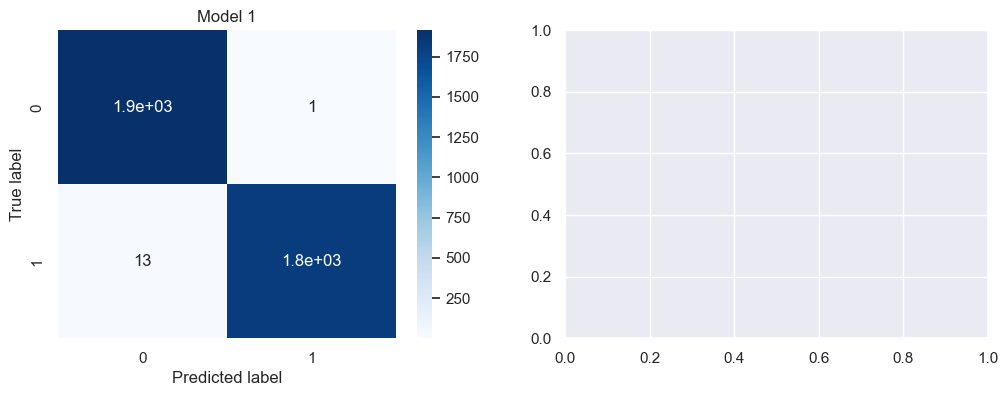

In [106]:
# Importing necessary functions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_recall_curve

y_pred_lr = lr.predict(X_test_bc)

conf_matrix_model = confusion_matrix(y_test_bc, y_pred_lr)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model 1')


axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
plt.show()

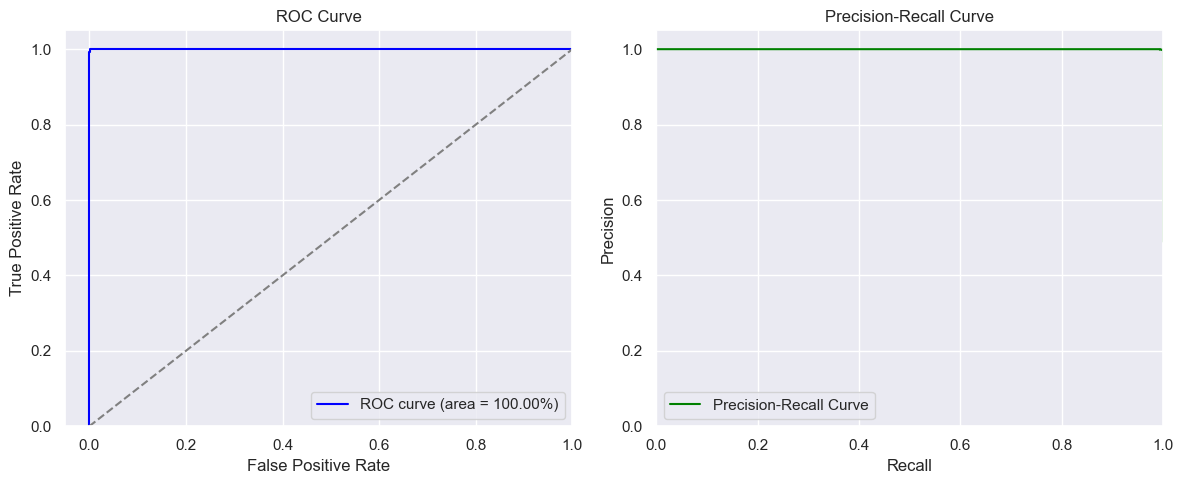

In [108]:
# Calculating probabilities and metrics for a single model
y_prob_lr = lr.predict_proba(X_test_bc)[:, 1] 

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bc, y_prob_lr)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bc, y_prob_lr)

# Plotting both curves
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
axs[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2%})', color='blue')
axs[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0].set_xlim([-0.05, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve')
axs[0].legend(loc='lower right')

# Plot Precision-Recall Curve
axs[1].plot(recall, precision, color='green', label='Precision-Recall Curve')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve')
axs[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

## **Support Vector Machine (Binary Classification)**

**Parameters:**
`kernel`: The kernel parameter specifies the type of kernel function to use. In this case, we have used rbf and poly kernel.

`C`: The C parameter controls the trade-off between maximizing the margin and minimizing the classification error.

`gamma`: The gamma parameter is a hyperparameter that determines the influence of a single training example on the decision boundary.

`random_state`: This is to ensure that the output is deterministic and can be reproduced.

In [112]:
from sklearn.svm import SVC

svm = SVC(kernel = 'rbf', C = 1, gamma = 0.1, random_state = 0, probability = True)
svm.fit(X_train_bc, y_train_bc)

cv_svm = cross_val_score(svm, X_train_bc, y_train_bc, cv = 5)
print('Support Vector Machine Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_svm)))
print(f'\nMean cross-validation score: {cv_svm.mean():.2f}')
print('SVM Model intercept:', *svm.intercept_)

Support Vector Machine Model

Cross-validation scores: 0.996, 0.9973333333333333, 0.9955555555555555, 0.9955555555555555, 0.9986666666666667

Mean cross-validation score: 1.00
SVM Model intercept: -0.4262407733161847


In [113]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_bc)

# Generate classification report
report = classification_report(y_test_bc, y_pred_svm)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1914
           1       1.00      0.99      0.99      1836

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



In [116]:
import joblib

# Save the SVM model to a file using joblib
svm_model_filename = 'svm_model.joblib'
joblib.dump(svm, svm_model_filename)

print(f'SVM model saved to {svm_model_filename}')

SVM model saved to svm_model.joblib


In [118]:
'''
# Load the Model
# Load the SVM model from the file
loaded_svm = joblib.load(svm_model_filename)

# Example of making predictions
predictions = loaded_svm.predict(X_test_bc)
print(predictions)
'''

'\n# Load the Model\n# Load the SVM model from the file\nloaded_svm = joblib.load(svm_model_filename)\n\n# Example of making predictions\npredictions = loaded_svm.predict(X_test_bc)\nprint(predictions)\n'

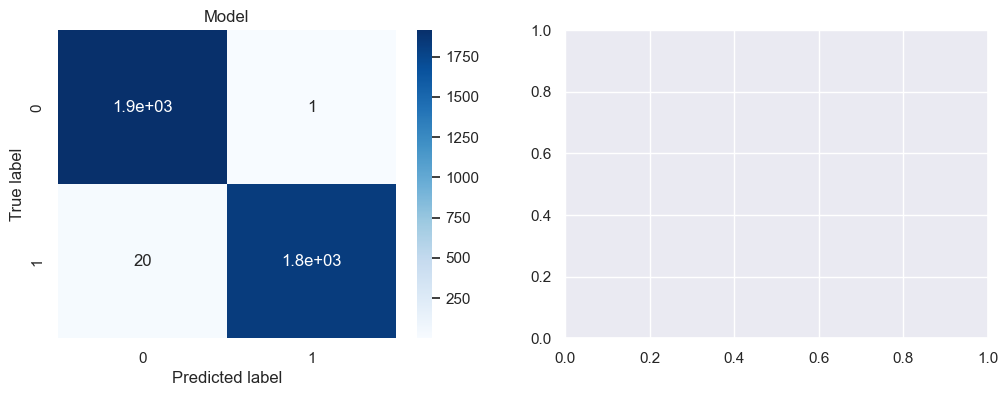

In [120]:
y_pred_svm = svm.predict(X_test_bc)

conf_matrix_model = confusion_matrix(y_test_bc, y_pred_svm)

fig, axs = plt.subplots(1, 2, figsize = (12, 4))

sns.heatmap(conf_matrix_model, annot = True, cmap = 'Blues', ax = axs[0])
axs[0].set_title('Model')

axs[0].set_xlabel('Predicted label')
axs[0].set_ylabel('True label')
plt.show()

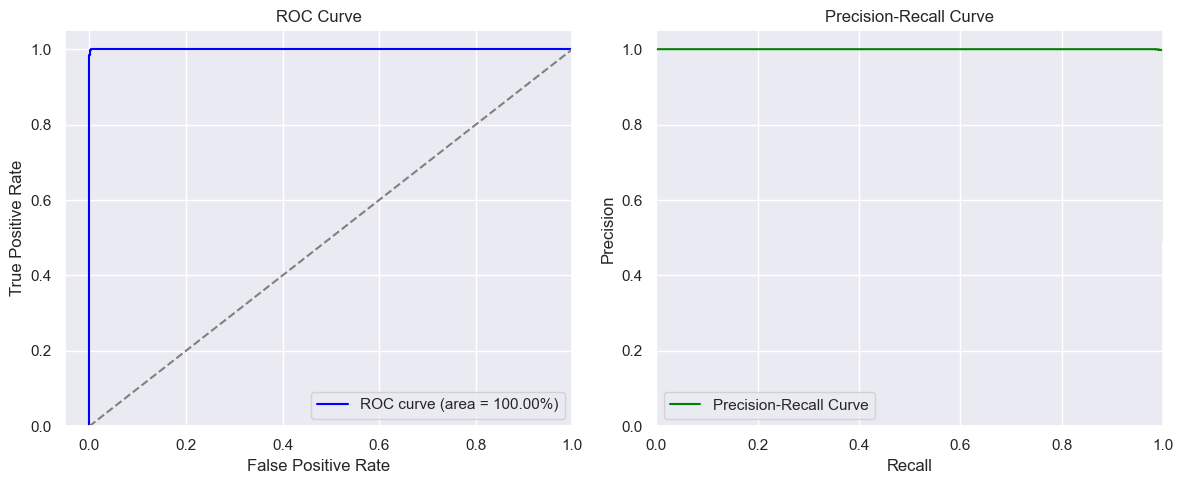

In [122]:
# Calculate probabilities and metrics for a single model
y_prob_svm = svm.predict_proba(X_test_bc)[:, 1]  # Use the probabilities predicted by the SVM model

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_bc, y_prob_svm)
roc_auc = auc(fpr, tpr)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_bc, y_prob_svm)

# Plotting both curves
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROC Curve
axs[0].plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2%})', color='blue')
axs[0].plot([0, 1], [0, 1], color='gray', linestyle='--')
axs[0].set_xlim([-0.05, 1.0])
axs[0].set_ylim([0.0, 1.05])
axs[0].set_xlabel('False Positive Rate')
axs[0].set_ylabel('True Positive Rate')
axs[0].set_title('ROC Curve')
axs[0].legend(loc='lower right')

# Plot Precision-Recall Curve
axs[1].plot(recall, precision, color='green', label='Precision-Recall Curve')
axs[1].set_xlim([0.0, 1.0])
axs[1].set_ylim([0.0, 1.05])
axs[1].set_xlabel('Recall')
axs[1].set_ylabel('Precision')
axs[1].set_title('Precision-Recall Curve')
axs[1].legend(loc='lower left')

plt.tight_layout()
plt.show()

**Creating a balanced dataset for Multi-Class Classification**

The following dataset is highly imbalanced, we took the help of **SMOTE (Synthetic Minority Over-sampling Technique)** to upsample the minority classes while creating a balanced dataset for multi-class classification. This helped us in creating an overall balanced dataset to feed the classification models.

In [126]:
new_data['Attack Type'].value_counts()

Attack Type
BENIGN          2096484
DoS              193748
DDoS             128016
Port Scan         90819
Brute Force        9152
Web Attack         2143
Bot                1953
Infiltration         36
Heartbleed           11
Name: count, dtype: int64

Ensures a more balanced dataset by controlling the number of samples per class.

In [129]:
class_counts = new_data['Attack Type'].value_counts()
selected_classes = class_counts[class_counts > 1950]
class_names = selected_classes.index
selected = new_data[new_data['Attack Type'].isin(class_names)]

dfs = []
for name in class_names:
  df = selected[selected['Attack Type'] == name]
  if len(df) > 2500:
    df = df.sample(n = 5000, random_state = 0)

  dfs.append(df)

df = pd.concat(dfs, ignore_index = True)
df['Attack Type'].value_counts()

Attack Type
BENIGN         5000
DoS            5000
DDoS           5000
Port Scan      5000
Brute Force    5000
Web Attack     2143
Bot            1953
Name: count, dtype: int64

Combines the upsampled features and labels into a new DataFrame (`blnc_data`).

In [131]:
import warnings
from imblearn.over_sampling import SMOTE

# Suppress specific FutureWarning from sklearn.base.BaseEstimator
warnings.filterwarnings("ignore", category=FutureWarning, message="`BaseEstimator._validate_data` is deprecated")

# Feature/target split
X = df.drop('Attack Type', axis=1)
y = df['Attack Type']

# SMOTE upsampling
smote = SMOTE(sampling_strategy='auto', random_state=0)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

# Recombine into DataFrame
blnc_data = pd.DataFrame(X_upsampled, columns=X.columns)
blnc_data['Attack Type'] = y_upsampled

# Shuffle the data
blnc_data = blnc_data.sample(frac=1)

# Display class distribution
print(blnc_data['Attack Type'].value_counts())


Attack Type
Brute Force    5000
DoS            5000
Bot            5000
Web Attack     5000
DDoS           5000
BENIGN         5000
Port Scan      5000
Name: count, dtype: int64


In [133]:
features = blnc_data.drop('Attack Type', axis = 1)
labels = blnc_data['Attack Type']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 0)

## **Random Forest Classifier**

**Parameters:**

`n_estimators`: This parameter specifies the number of decision trees to fit in the random forest.

`max_depth`: This parameter specifies the maximum depth of each decision tree in the random forest.

`max_features`: This parameter specifies the number of features to consider when looking for the best split in each tree.

`random_state`: This is to ensure that the output is deterministic and can be reproduced.

In [138]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 15, max_depth = 8, max_features = 20, random_state = 0)
rf.fit(X_train, y_train)

cv_rf = cross_val_score(rf, X_train, y_train, cv = 5)
print('Random Forest Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_rf)))
print(f'\nMean cross-validation score: {cv_rf.mean():.2f}')

Random Forest Model

Cross-validation scores: 0.9952380952380953, 0.9944761904761905, 0.9956190476190476, 0.9961904761904762, 0.9956190476190476

Mean cross-validation score: 1.00


In [139]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_rf)
print(report)

              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99      1249
         Bot       0.98      1.00      0.99      1260
 Brute Force       1.00      1.00      1.00      1234
        DDoS       1.00      1.00      1.00      1207
         DoS       1.00      1.00      1.00      1261
   Port Scan       1.00      1.00      1.00      1247
  Web Attack       1.00      1.00      1.00      1292

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



In [140]:
import joblib

# Save the Random Forest model to a file using joblib
rf_model_filename = 'random_forest_model.joblib'
joblib.dump(rf, rf_model_filename)

print(f'Random Forest model saved to {rf_model_filename}')

Random Forest model saved to random_forest_model.joblib


In [141]:
'''
# Load the Random Forest model from the file
loaded_rf = joblib.load(rf_model_filename)

# Example of making predictions
predictions = loaded_rf.predict(X_test)
print(predictions)
'''

'\n# Load the Random Forest model from the file\nloaded_rf = joblib.load(rf_model_filename)\n\n# Example of making predictions\npredictions = loaded_rf.predict(X_test)\nprint(predictions)\n'

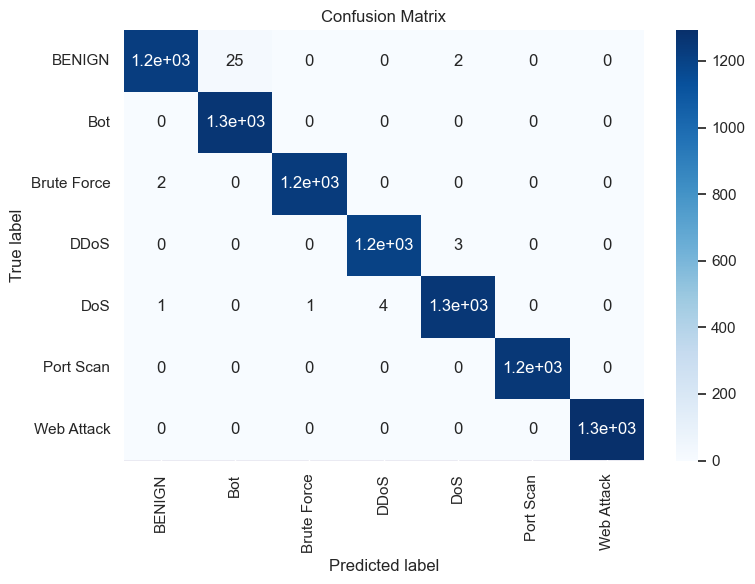

In [146]:
# Predicting using the first random forest model
y_pred_rf = rf.predict(X_test)

# Generating the confusion matrix for model 1
conf_matrix_model = confusion_matrix(y_test, y_pred_rf)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model, annot=True, cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## **Decision Tree Classifier**

**Parameters:**

`max_depth`: This parameter specifies the maximum depth of the tree.


In [150]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(X_train, y_train)

cv_dt = cross_val_score(dt, X_train, y_train, cv = 5)
print('Decision Tree Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_dt)))
print(f'\nMean cross-validation score: {cv_dt.mean():.2f}')

Decision Tree Model

Cross-validation scores: 0.9914285714285714, 0.9889523809523809, 0.992, 0.9912380952380953, 0.9904761904761905

Mean cross-validation score: 0.99


In [152]:
# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_dt)
print(report)

              precision    recall  f1-score   support

      BENIGN       0.99      0.96      0.98      1249
         Bot       0.97      1.00      0.99      1260
 Brute Force       1.00      1.00      1.00      1234
        DDoS       0.99      0.99      0.99      1207
         DoS       0.99      0.99      0.99      1261
   Port Scan       1.00      1.00      1.00      1247
  Web Attack       1.00      1.00      1.00      1292

    accuracy                           0.99      8750
   macro avg       0.99      0.99      0.99      8750
weighted avg       0.99      0.99      0.99      8750



In [154]:
import joblib

# Save the Decision Tree model to a file using joblib
dt_model_filename = 'decision_tree_model.joblib'
joblib.dump(dt, dt_model_filename)

print(f'Decision Tree model saved to {dt_model_filename}')

Decision Tree model saved to decision_tree_model.joblib


In [156]:
'''
# Load the Decision Tree model from the file
loaded_dt = joblib.load(dt_model_filename)

# Example of making predictions
predictions = loaded_dt.predict(X_test)
print(predictions)
'''

'\n# Load the Decision Tree model from the file\nloaded_dt = joblib.load(dt_model_filename)\n\n# Example of making predictions\npredictions = loaded_dt.predict(X_test)\nprint(predictions)\n'

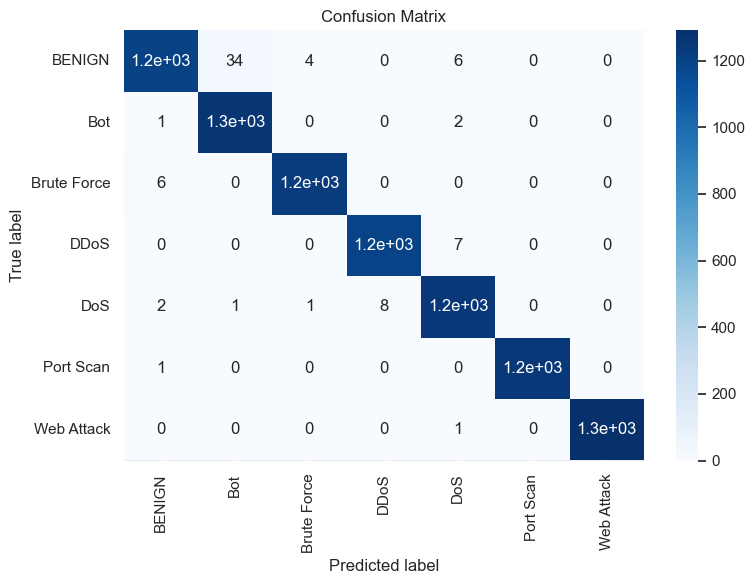

In [158]:
# Predicting using the first decision tree model
y_pred_dt = dt.predict(X_test)

# Generating the confusion matrix for model 1
conf_matrix_model = confusion_matrix(y_test, y_pred_dt)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model, annot=True, cmap='Blues', xticklabels=dt.classes_, yticklabels=dt.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

## **K Nearest Neighbours**

**Parameters:**

`n_neighbors`: This is a hyperparameter of the KNN algorithm that specifies the number of neighbors to consider when making predictions for a new input data point. 

In [162]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)

cv_knn = cross_val_score(knn, X_train, y_train, cv = 5)
print('K Nearest Neighbors Model')
print(f'\nCross-validation scores:', ', '.join(map(str, cv_knn)))
print(f'\nMean cross-validation score: {cv_knn.mean():.2f}')

K Nearest Neighbors Model

Cross-validation scores: 0.9912380952380953, 0.993904761904762, 0.9946666666666667, 0.9929523809523809, 0.9925714285714285

Mean cross-validation score: 0.99


In [164]:
# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred_knn)
print(report)

              precision    recall  f1-score   support

      BENIGN       0.99      0.98      0.99      1249
         Bot       0.98      1.00      0.99      1260
 Brute Force       1.00      1.00      1.00      1234
        DDoS       1.00      1.00      1.00      1207
         DoS       0.99      0.99      0.99      1261
   Port Scan       1.00      1.00      1.00      1247
  Web Attack       1.00      1.00      1.00      1292

    accuracy                           0.99      8750
   macro avg       0.99      0.99      0.99      8750
weighted avg       0.99      0.99      0.99      8750



In [166]:
import joblib

# Save the KNN model to a file using joblib
knn_model_filename = 'knn_model.joblib'
joblib.dump(knn, knn_model_filename)

print(f'K Nearest Neighbors model saved to {knn_model_filename}')

K Nearest Neighbors model saved to knn_model.joblib


In [168]:
import joblib

# Save the KNN model to a file using joblib
knn_model_filename = 'knn_model.joblib'
joblib.dump(knn, knn_model_filename)

print(f'K Nearest Neighbors model saved to {knn_model_filename}')

K Nearest Neighbors model saved to knn_model.joblib


In [170]:
'''
# Load the KNN model from the file
loaded_knn = joblib.load(knn_model_filename)

# Example of making predictions
predictions = loaded_knn.predict(X_test)
print(predictions)
'''

'\n# Load the KNN model from the file\nloaded_knn = joblib.load(knn_model_filename)\n\n# Example of making predictions\npredictions = loaded_knn.predict(X_test)\nprint(predictions)\n'

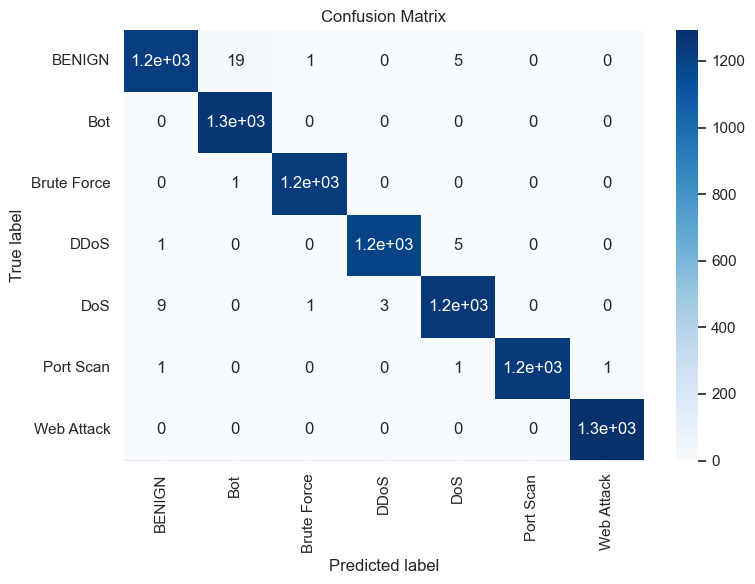

In [172]:
# Predicting using the first KNN model
y_pred_knn = knn.predict(X_test)

# Generating the confusion matrix for model 1
conf_matrix_model = confusion_matrix(y_test, y_pred_knn)

# Creating a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_model, annot=True, cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

# **5. Deep Learning Models**

# **DNN**

 **Dense Neural Network (DNN)**

In [177]:
#Deep Nueral Network with Keras
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.utils import plot_model

In [178]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="keras")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD

# Define the model using Input() for clean architecture
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(70, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile the model (removed deprecated `decay`)
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [181]:
# fit the keras model on the dataset
model.fit(X_train_bc, y_train_bc,
          epochs=200,
          batch_size=300,verbose=1, validation_split=0.1)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6232 - loss: 0.7009 - val_accuracy: 0.9387 - val_loss: 0.2832
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8815 - loss: 0.3454 - val_accuracy: 0.9742 - val_loss: 0.0850
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9504 - loss: 0.1760 - val_accuracy: 0.9884 - val_loss: 0.0351
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9645 - loss: 0.1294 - val_accuracy: 0.9973 - val_loss: 0.0204
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9795 - loss: 0.0841 - val_accuracy: 0.9929 - val_loss: 0.0154
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9754 - loss: 0.0884 - val_accuracy: 0.9982 - val_loss: 0.0095
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9808 - loss: 0.0745 - val_accuracy: 1.0000 - val_loss: 0.0057
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9888 - loss: 0.0698 - val_accuracy: 1.0000 - v

In [183]:
# evaluate the keras model
_, accuracy = model.evaluate(X_test_bc, y_test_bc)
print('Accuracy: %.2f' % (accuracy*100))

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 1.0000 - loss: 4.8218e-04
Accuracy: 99.97


In [185]:
# Make predictions on the test set
y_pred = (model.predict(X_test_bc) > 0.5).astype("int32")  # Thresholding for binary classification

# Generate classification report
report = classification_report(y_test_bc, y_pred)
print(report)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1914
           1       1.00      1.00      1.00      1836

    accuracy                           1.00      3750
   macro avg       1.00      1.00      1.00      3750
weighted avg       1.00      1.00      1.00      3750



In [187]:
model.save('keras_model_bc.keras')
print('Model saved as keras_model_bc.keras')


Model saved as keras_model_bc.keras


In [189]:
'''
from tensorflow.keras.models import load_model

# Load the model from the .h5 file
loaded_model = load_model('keras_model.h5')

# Example of making predictions using the loaded model
predictions = loaded_model.predict(X_test_bc)
print(predictions)
'''

"\nfrom tensorflow.keras.models import load_model\n\n# Load the model from the .h5 file\nloaded_model = load_model('keras_model.h5')\n\n# Example of making predictions using the loaded model\npredictions = loaded_model.predict(X_test_bc)\nprint(predictions)\n"

In [191]:
# Assuming X and y are your complete dataset and labels
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val), 
    epochs=10, 
    batch_size=32
)

# Your plotting code remains the same
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()



ValueError: Invalid dtype: object

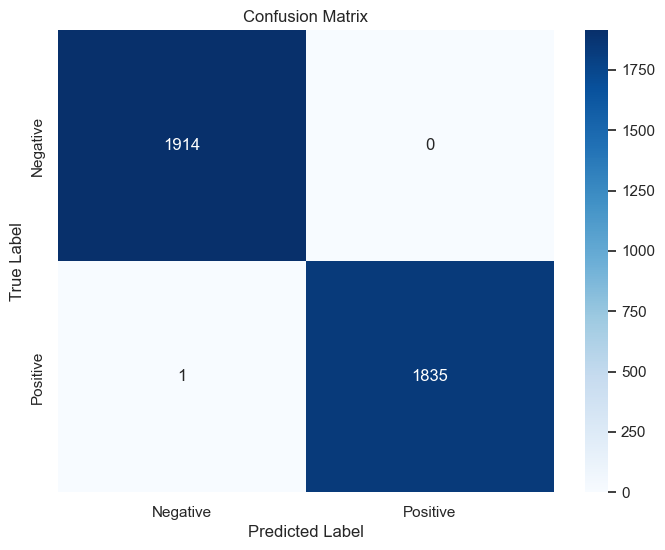

In [193]:
# Confusion Matrix and Heatmap
conf_matrix = confusion_matrix(y_test_bc, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# **CNN New**

In [196]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import logging 

# Enable logging
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

In [198]:
# One-Hot Encoding Labels
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_encoded = encoder.transform(np.array(y_test).reshape(-1, 1))

In [200]:
# Reshape the dataset for CNN (assuming your data has 35 features)
def reshape_for_cnn(X):
    feature_count = X.shape[1]
    size = int(np.ceil(np.sqrt(feature_count)))  # Adjust size to fit square
    padded = np.zeros((X.shape[0], size ** 2))
    padded[:, :feature_count] = X
    reshaped = padded.reshape((padded.shape[0], size, size, 1))
    return reshaped

X_train_cnn = reshape_for_cnn(X_train.to_numpy())
X_test_cnn = reshape_for_cnn(X_test.to_numpy())

logging.info(f"Reshaped X_train: {X_train_cnn.shape}")
logging.info(f"Reshaped X_test: {X_test_cnn.shape}")

20:54:48 INFO Reshaped X_train: (23276, 6, 6, 1)
20:54:48 INFO Reshaped X_test: (8750, 6, 6, 1)


In [202]:
# Define CNN Model
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create model
input_shape = X_train_cnn.shape[1:]  # Shape of one sample
num_classes = y_train_encoded.shape[1]  # Number of unique classes
cnn_model = create_cnn_model(input_shape, num_classes)

# Logging Model Summary
logging.info(cnn_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 6, 6, 64)       │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,463 (1.54 MB)

 Trainable params: 403,463 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

20:54:48 INFO None


In [204]:
# Define Callbacks
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = callbacks.ModelCheckpoint("cnn_model_best.keras", monitor='val_accuracy', save_best_only=True)

In [206]:
# Train the model
history = cnn_model.fit(X_train_cnn, y_train_encoded,
                        validation_data=(X_test_cnn, y_test_encoded),
                        batch_size=128,
                        epochs=50,
                        callbacks=[early_stopping, model_checkpoint],
                        verbose=1)

Epoch 1/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.6784 - loss: 0.8713 - val_accuracy: 0.9753 - val_loss: 0.1079
Epoch 2/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9813 - loss: 0.0772 - val_accuracy: 0.9845 - val_loss: 0.0870
Epoch 3/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9860 - loss: 0.0549 - val_accuracy: 0.9953 - val_loss: 0.0213
Epoch 4/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9893 - loss: 0.0425 - val_accuracy: 0.9983 - val_loss: 0.0103
Epoch 5/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9948 - loss: 0.0239 - val_accuracy: 0.9981 - val_loss: 0.0078
Epoch 6/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9951 - loss: 0.0188 - val_accuracy: 0.9973 - val_loss: 0.0134
Epoch 7/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9963 - loss: 0.0164 - val_accuracy: 0.9974 - val_loss: 0.0092
Epoch 8/50
182/182 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9953 - loss: 0.0158 - val_accu

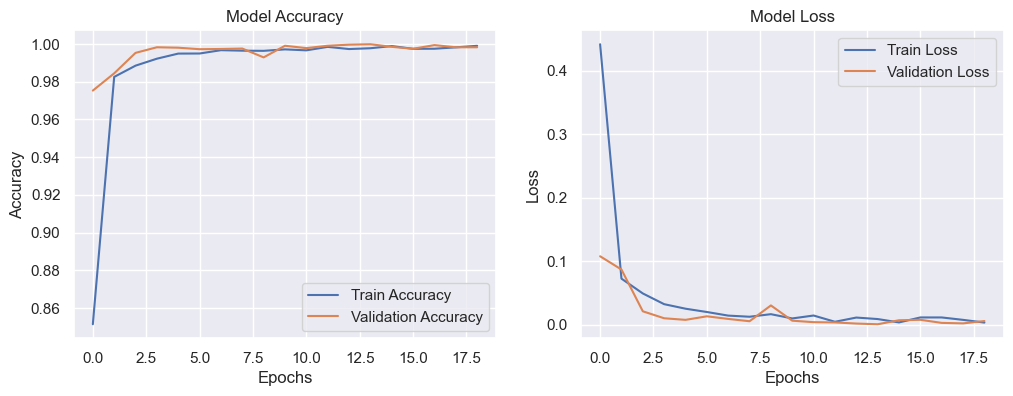

20:55:51 INFO Test Accuracy: 0.9999, Test Loss: 0.0009


In [207]:
# Plot Training History
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()

plot_training_history(history)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test_cnn, y_test_encoded, verbose=0)
logging.info(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

In [208]:
# Save the final model
cnn_model.save("final_cnn_model.keras")
logging.info("Model saved as 'final_cnn_model.keras'")

20:55:51 INFO Model saved as 'final_cnn_model.keras'


In [209]:
'''
import tensorflow as tf

# Load the trained CNN model
cnn_model = tf.keras.models.load_model("final_cnn_model.h5")
print("Model loaded successfully!")
'''

'\nimport tensorflow as tf\n\n# Load the trained CNN model\ncnn_model = tf.keras.models.load_model("final_cnn_model.h5")\nprint("Model loaded successfully!")\n'

In [210]:
# Predict on the test data
predictions = cnn_model.predict(X_test_cnn, verbose=1)

# Convert probabilities to class labels
predicted_classes = predictions.argmax(axis=1)

# Decode the one-hot encoded labels back to class names
true_classes = y_test_encoded.argmax(axis=1)
print("Predictions completed!")

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predictions completed!


Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1249
         Bot       1.00      1.00      1.00      1260
 Brute Force       1.00      1.00      1.00      1234
        DDoS       1.00      1.00      1.00      1207
         DoS       1.00      1.00      1.00      1261
   Port Scan       1.00      1.00      1.00      1247
  Web Attack       1.00      1.00      1.00      1292

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



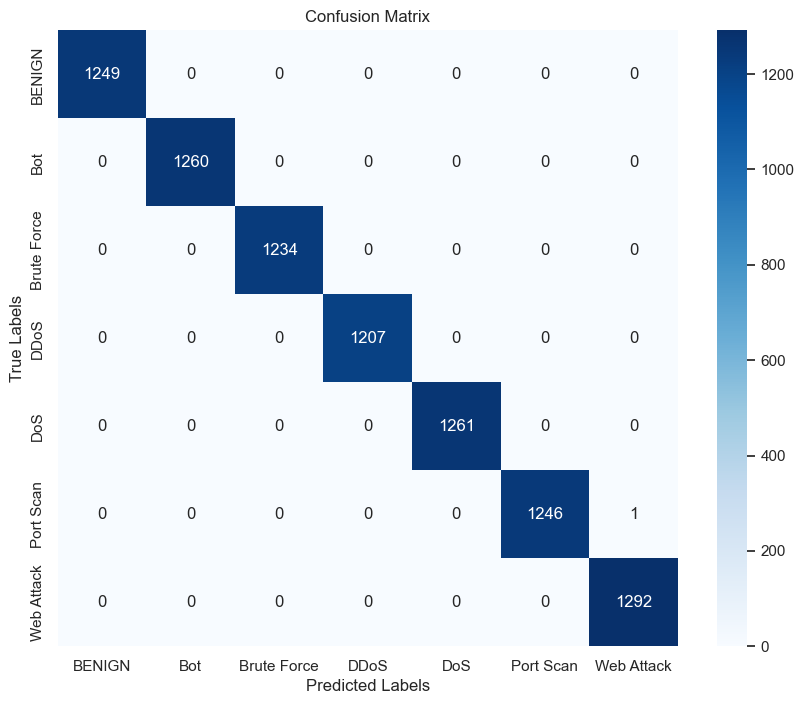

In [211]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=encoder.categories_[0])
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=encoder.categories_[0], 
            yticklabels=encoder.categories_[0])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **MLP**

In [219]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [221]:
from sklearn.preprocessing import LabelEncoder

# Encode labels for MLPClassifier
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Get label names for classification report
label_names = label_encoder.classes_

In [223]:
# Initialize the MLP model
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100,),  # Single hidden layer with 100 neurons
    activation='logistic',
    solver='adam',
    learning_rate_init=0.0001,
    max_iter=2000,
    random_state=0
)

In [225]:
# Train the model
print('[MLP] Training...')
mlp_model.fit(X_train, y_train_encoded)
print('[MLP] Training completed!')

[MLP] Training...
[MLP] Training completed!


In [226]:
# Predict on the test set
y_pred = mlp_model.predict(X_test)

Accuracy: 0.9994
Confusion Matrix:
[[1249    0    0    0    0    0    0]
 [   0 1260    0    0    0    0    0]
 [   0    0 1233    1    0    0    0]
 [   0    0    0 1207    0    0    0]
 [   0    0    0    0 1261    0    0]
 [   0    0    0    0    1 1243    3]
 [   0    0    0    0    0    0 1292]]


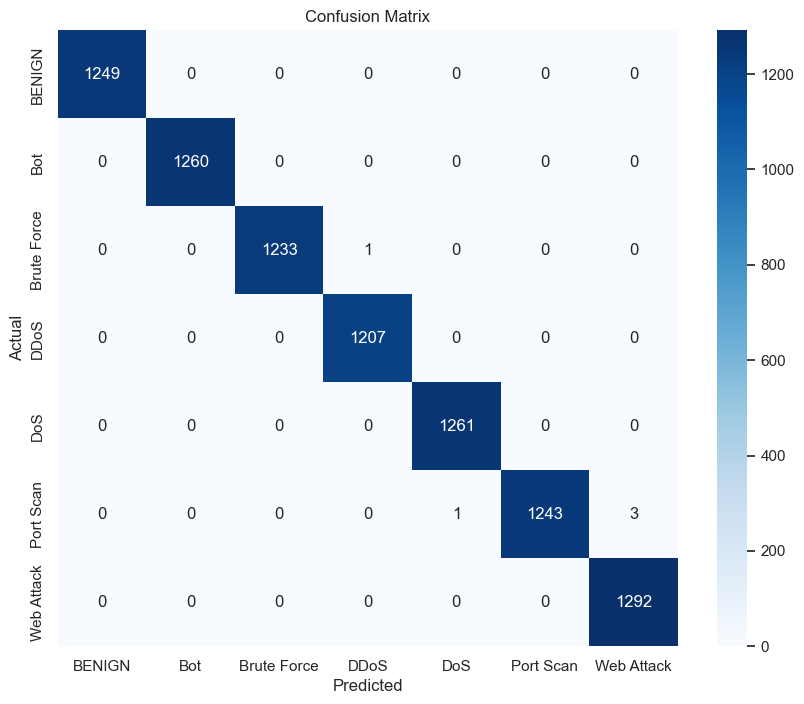

In [229]:
# Calculate Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [231]:
# Generate Classification Report
print('Classification Report:')
report = classification_report(y_test_encoded, y_pred, target_names=label_names)
print(report)

Classification Report:
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1249
         Bot       1.00      1.00      1.00      1260
 Brute Force       1.00      1.00      1.00      1234
        DDoS       1.00      1.00      1.00      1207
         DoS       1.00      1.00      1.00      1261
   Port Scan       1.00      1.00      1.00      1247
  Web Attack       1.00      1.00      1.00      1292

    accuracy                           1.00      8750
   macro avg       1.00      1.00      1.00      8750
weighted avg       1.00      1.00      1.00      8750



In [233]:
import joblib

# Save the trained model
joblib.dump(mlp_model, 'mlp_model.pkl')
print("MLP model saved as 'mlp_model.pkl'")

MLP model saved as 'mlp_model.pkl'


In [235]:
'''
# Load the saved model
loaded_model = joblib.load('mlp_model.pkl')
print("MLP model loaded successfully!")

# Predict using the loaded model
loaded_y_pred = loaded_model.predict(X_test)
'''

'\n# Load the saved model\nloaded_model = joblib.load(\'mlp_model.pkl\')\nprint("MLP model loaded successfully!")\n\n# Predict using the loaded model\nloaded_y_pred = loaded_model.predict(X_test)\n'

# **6. Performance Evaluation**

## **Machine Learning Models**

**Binary Classification Algorithms:**

In [240]:
import pandas as pd
from sklearn.metrics import classification_report

# Make predictions & Generate classification report for Logistic Regression
y_pred_lr = lr.predict(X_test_bc)
report_lr = classification_report(y_test_bc, y_pred_lr, output_dict=True)

# Make predictions & Generate classification report for Support Vector Machine
y_pred_svm = svm.predict(X_test_bc)
report_svm = classification_report(y_test_bc, y_pred_svm, output_dict=True)

# Extract relevant metrics for both models
metrics_lr = report_lr['1']  
metrics_svm = report_svm['1'] 

# Create a DataFrame to compare models
comparison_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall', 'F1-Score', 'Support'],
    'Logistic Regression': [metrics_lr['precision'], metrics_lr['recall'], metrics_lr['f1-score'], metrics_lr['support']],
    'Support Vector Machine': [metrics_svm['precision'], metrics_svm['recall'], metrics_svm['f1-score'], metrics_svm['support']]
})

# Calculate Accuracy for both models
accuracy_lr = (y_pred_lr == y_test_bc).mean()
accuracy_svm = (y_pred_svm == y_test_bc).mean()

# Add Accuracy to the DataFrame using pd.concat
accuracy_df = pd.DataFrame({
    'Metric': ['Accuracy'],
    'Logistic Regression': [accuracy_lr],
    'Support Vector Machine': [accuracy_svm]
})

# Concatenate the accuracy DataFrame with the comparison DataFrame
comparison_df = pd.concat([comparison_df, accuracy_df], ignore_index=True)

# Display the comparison table
print("### Binary Classification Comparison Table ###")
print(comparison_df)

### Binary Classification Comparison Table ###
      Metric  Logistic Regression  Support Vector Machine
0  Precision             0.999452                0.999450
1     Recall             0.992919                0.989107
2   F1-Score             0.996175                0.994251
3    Support          1836.000000             1836.000000
4   Accuracy             0.996267                0.994400


**Multi-Class Classification Algorithms:**

### Binary Classification Comparison Table ###
           Model    BENIGN       Bot  Brute Force      DDoS       DoS  \
0            KNN  0.991093  0.984375     0.998381  0.997508  0.991263   
1  Decision Tree  0.991770  0.972910     0.995945  0.993377  0.987352   
2  Random Forest  0.997551  0.980545     0.999189  0.996689  0.996032   

   Port Scan  Web Attack  Accuracy  
0        1.0    0.999227  0.994514  
1        1.0    1.000000  0.991543  
2        1.0    1.000000  0.995657  


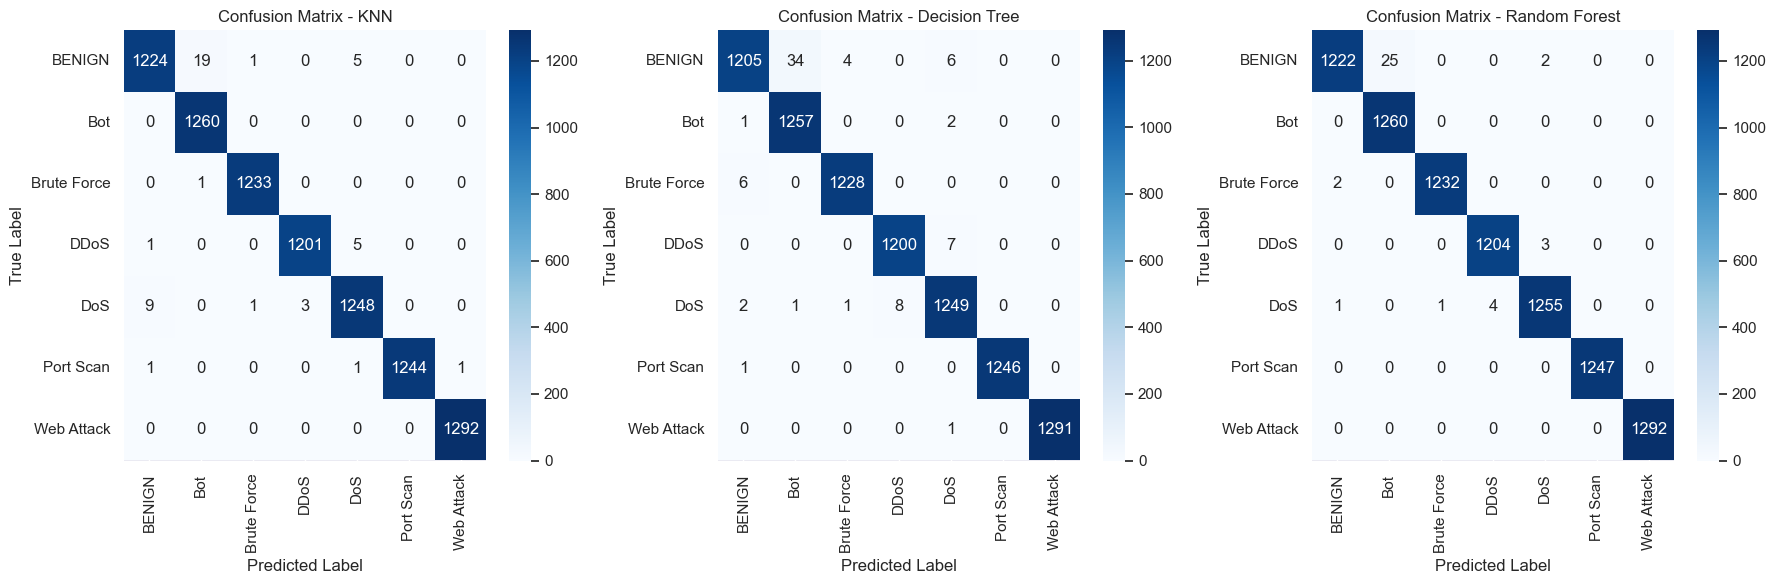

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test set for KNN
y_pred_knn = knn.predict(X_test)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Make predictions on the test set for Decision Tree
y_pred_dt = dt.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Make predictions on the test set for Random Forest
y_pred_rf = rf.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Extract relevant metrics for all models
class_labels = ['BENIGN', 'Bot', 'Brute Force', 'DDoS', 'DoS', 'Port Scan', 'Web Attack']

# Create a DataFrame to compare models
comparison_df = pd.DataFrame(columns=['Metric'] + class_labels + ['Accuracy'])

# Fill in metrics for each model
for model_name, report in zip(['KNN', 'Decision Tree', 'Random Forest'], [report_knn, report_dt, report_rf]):
    metrics = [report[label] for label in class_labels]  # Extract metrics for each class
    accuracies = report['accuracy']  # Overall accuracy
    comparison_df.loc[len(comparison_df)] = [model_name] + [metrics[i]['precision'] for i in range(len(class_labels))] + [accuracies]

# Rename the DataFrame columns appropriately
comparison_df.columns = ['Model'] + class_labels + ['Accuracy']

# Display the comparison table
print("### Binary Classification Comparison Table ###")
print(comparison_df)

# Plotting confusion matrices and heatmaps for each model
models = {'KNN': (y_pred_knn, knn), 'Decision Tree': (y_pred_dt, dt), 'Random Forest': (y_pred_rf, rf)}
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, (model_name, (y_pred, model)) in zip(axs, models.items()):
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=model.classes_, yticklabels=model.classes_, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

plt.tight_layout()
plt.show()